In [1]:
#Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Data loading 

In [2]:
from sklearn.datasets import load_wine
# from sklearn dataset to panda dataframe
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df
data_sk = load_wine()


data = sklearn_to_df(data_sk)

In [3]:
#dataset information provided by sklearn.
print(data_sk.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
#checking the features set and target 
data.head(-1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0,2
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2


In [5]:
# initial check for Na values or missing data points
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

## Data exploring

In [6]:
#reacast into long format.
df_wine_plot = data.melt(['target'], var_name= "cols", value_name='vals')

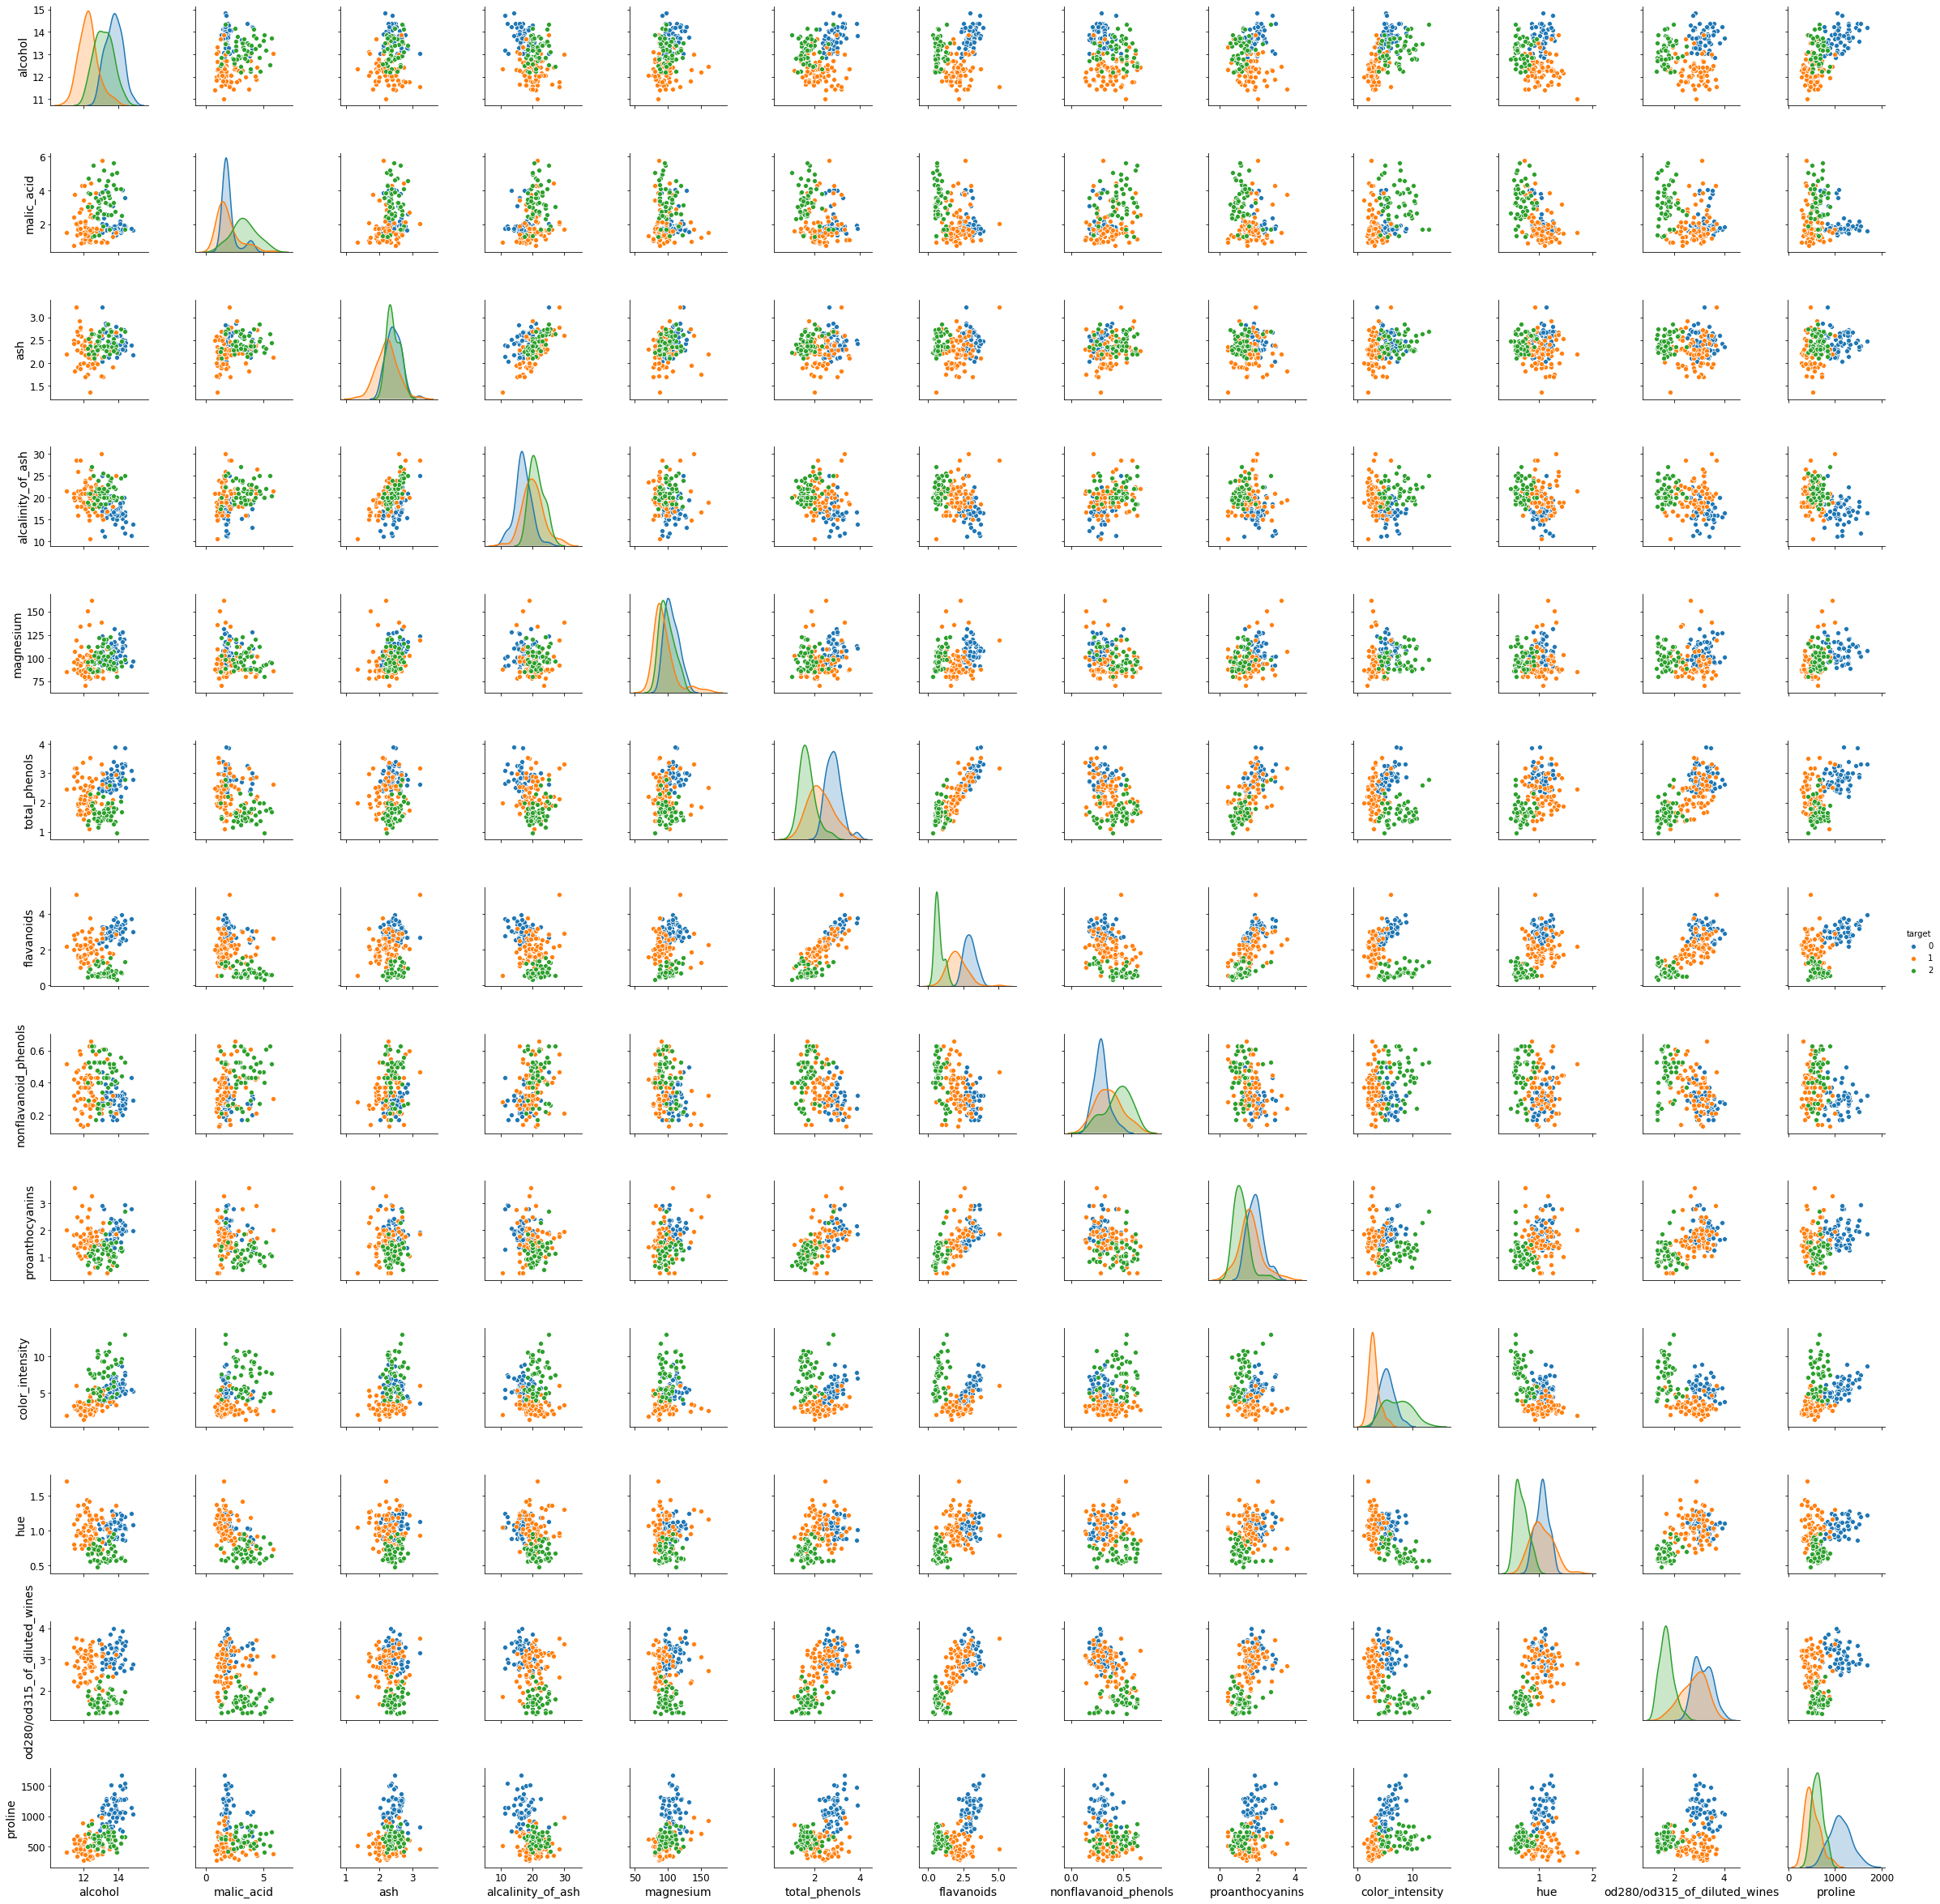

In [7]:
# plotting the features according to the targets. 
sns.pairplot(data, hue= "target")

/home/roasted_kernel/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:100: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


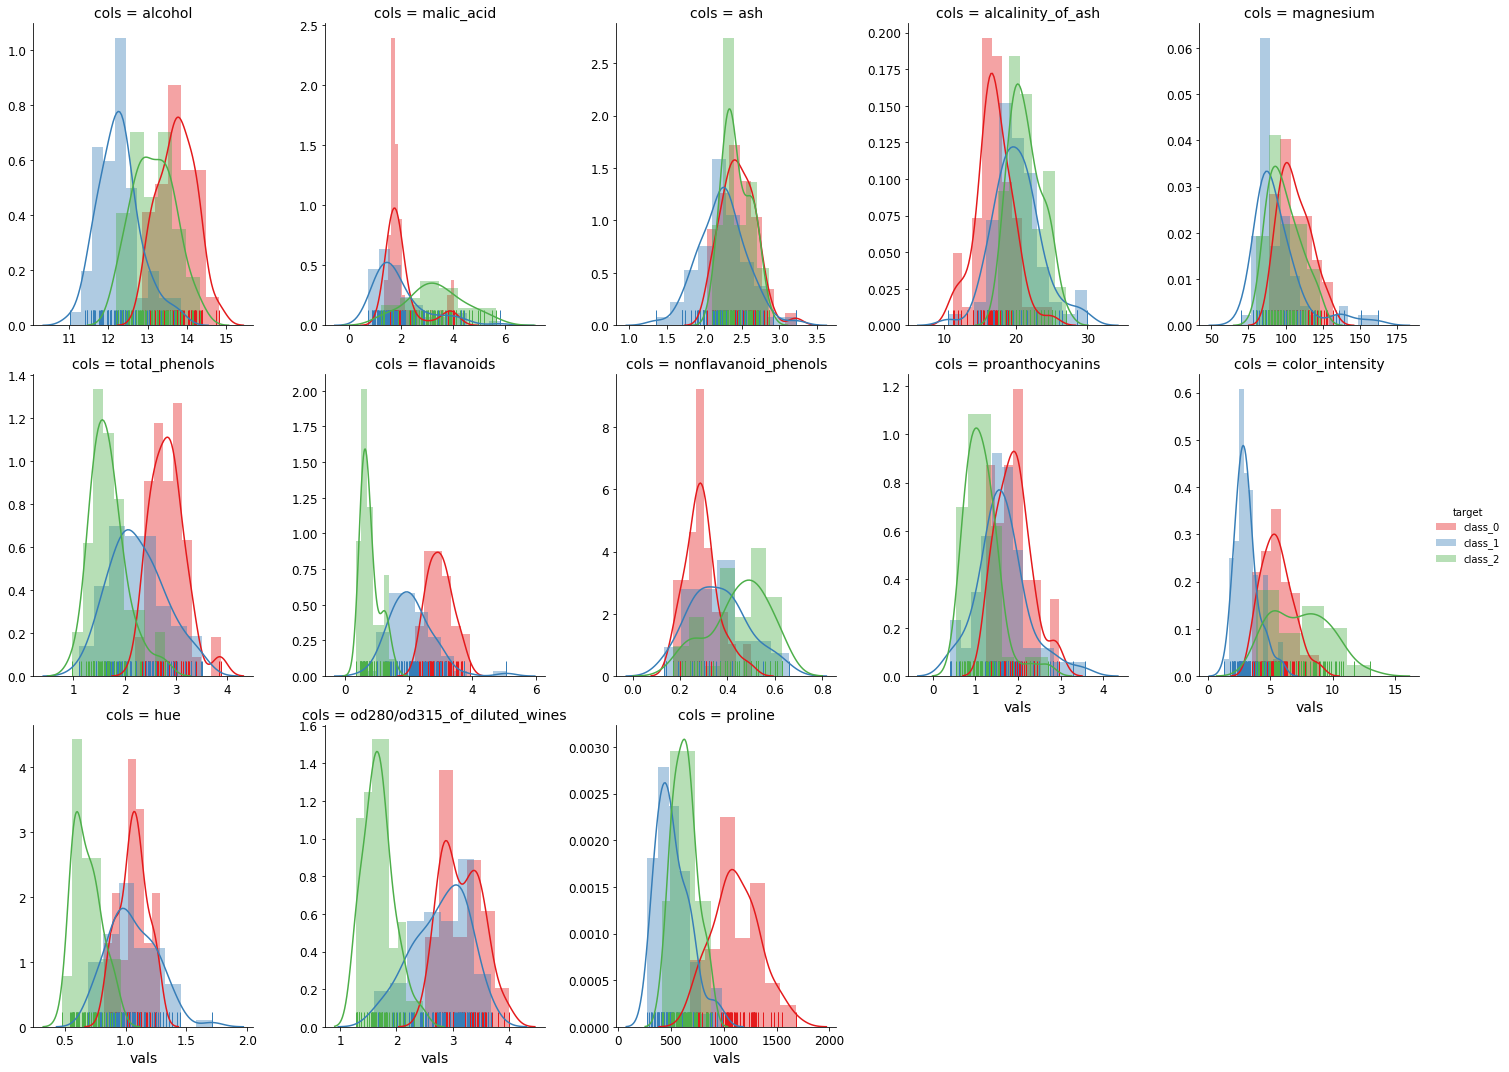

In [8]:
# plotting the dist of every feature

wine_plot = sns.FacetGrid(df_wine_plot, col='cols', hue="target", palette="Set1",
                       sharex=False, sharey=False, col_wrap=5 ,height=5, aspect=0.8)
wine_plot = (wine_plot.map(sns.distplot, "vals", hist=True, rug=True))
wine_plot.add_legend(labels=["class_0","class_1","class_2"])

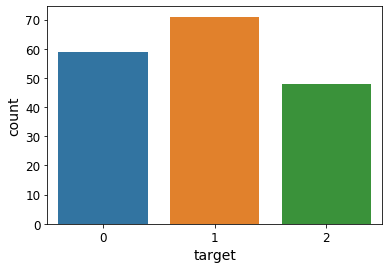

In [9]:
# checking for class unbalance
sns.countplot(data['target'])

## Data Segregation

In [10]:
from sklearn.model_selection import train_test_split

#splitting training and test set 
X = data.drop(columns="target")
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size= 0.30, random_state=0)

X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
22,13.71,1.86,2.36,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035.0
108,12.22,1.29,1.94,19.0,92.0,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
145,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0
67,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0
117,12.42,1.61,2.19,22.5,108.0,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345.0
47,13.90,1.68,2.12,16.0,101.0,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985.0


In [11]:
# for pritning results
def results(clf, X_test, y_test):
    from sklearn.metrics import plot_confusion_matrix
    from sklearn.metrics import classification_report
    
    plot_confusion_matrix(clf, X_test, y_test)
    
    y_pred = clf.predict(X_test)
    
    print(classification_report(y_test, y_pred))

### Model 1 Selection

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# preparing DT model
# set class_weight="balanced" to counter the unbalanced data
DecisionTree = DecisionTreeClassifier(criterion='gini', random_state=0 ,
                class_weight="balanced")


## Model 2 Training and Hyperparameter Tuning 

In [13]:
# grid search parameters 
max_depth_range = list(range(1, 11))
min_samples_split_range = list(range(1, 21))
min_samples_leaf_range = list(range(1, 21))

param_grid = dict(max_depth=max_depth_range, 
                  min_samples_split=min_samples_split_range,
                 min_samples_leaf = min_samples_leaf_range)
# perform grid search
gridsearch_DT = GridSearchCV(DecisionTree, param_grid, cv=5, n_jobs=-1, scoring="balanced_accuracy", )

gridsearch_DT.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
      

In [14]:
# results of the search.
gridsearch_DT.best_params_

{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}

## Candidate Model 1 Evaluation

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.91      0.91      0.91        22
           2       0.92      0.92      0.92        13

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



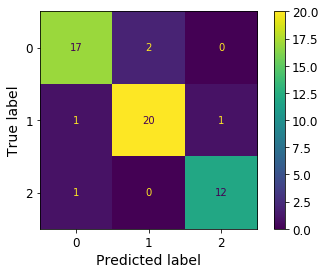

In [15]:
# best DT model
DT_clf = gridsearch_DT.best_estimator_
# results for DT classifier.
results(DT_clf, X_test, y_test)

## Model 2 Selection

In [16]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA

#prepare SVM classifer. 
# set class_weight="balanced" to counter the unbalanced data

svm_clf = SVC(class_weight="balanced" , random_state=0)


# pipelines for different kernels for SVM classifier.
scaled = Pipeline([('scaler', StandardScaler())])                          

reduced_pca = Pipeline([('scaler', StandardScaler()), ('pca',PCA(n_components=3))])

reduced_kpca = Pipeline([('scaler', StandardScaler()), 
                          ('kpca', KernelPCA(kernel='rbf',n_components=2))])


scaled_fit = scaled.fit(X_train)
pca_fit = reduced_pca.fit(X_train)
kpca_fit = reduced_kpca.fit(X_train)


X_train_scaled = scaled_fit.transform(X_train)
X_test_scaled = scaled_fit.transform(X_test)

X_train_pca = pca_fit.transform(X_train)
X_test_pca = pca_fit.transform(X_test)

X_train_kpca = kpca_fit.transform(X_train)
X_test_kpca = kpca_fit.transform(X_test)



## Model 2 Training and Hyperparameter Tuning 

In [17]:
# grid seach to preform search for every estimator according to the pipline. 
def GridSearch_to_clf(X,y):
    from sklearn.model_selection import GridSearchCV
    
    param_grid = [
  {'C': [1, 5, 10, 50, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 5, 10, 50, 100, 1000], 'gamma': [0.001, 0.0001,0.0005, 0.005], 'kernel': ['rbf']},]
    grid_search = GridSearchCV(svm_clf, param_grid, n_jobs=-1, 
                                        cv=5, scoring="balanced_accuracy")

    grid_search.fit(X,y)
    
    return grid_search.best_estimator_
    

In [18]:
svm_scaled_clf = GridSearch_to_clf(X_train_scaled, y_train)
svm_pca_clf = GridSearch_to_clf(X_train_pca, y_train)
svm_kpca_clf = GridSearch_to_clf(X_train_kpca,y_train)



## Candidate Model 2( SVM+SCALED) Evaluation

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        22
           2       0.93      1.00      0.96        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



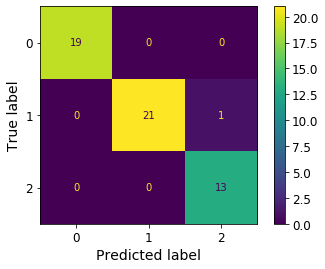

In [19]:
results(svm_scaled_clf, X_test_scaled,y_test)

## Candidate Model 2( SVM+SCALED+PCA) Evaluation

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.95      0.98        22
           2       1.00      1.00      1.00        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



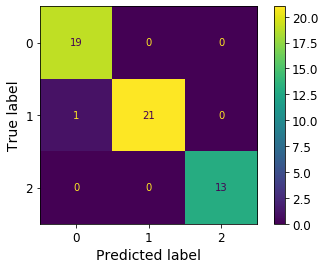

In [20]:
results(svm_pca_clf, X_test_pca,y_test)

## Candidate Model 2( SVM+SCALED+KPCA) Evaluation

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



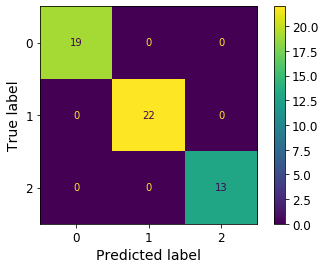

In [21]:
results(svm_kpca_clf, X_test_kpca, y_test)